In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

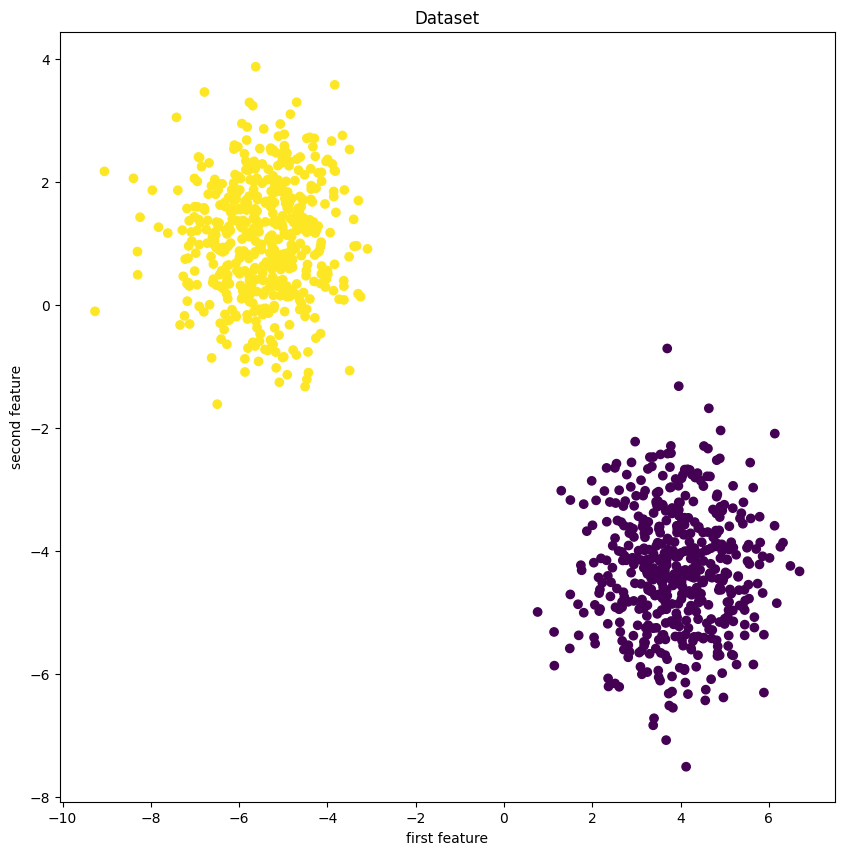

In [21]:
# Dataset

#we will perform logistic regression using a simple toy dataset of two classes.

X, y_true = make_blobs(n_samples = 1000, centers = 2)

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c = y_true)
plt.title("Dataset")
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [22]:
# Reshape targets to  get column vector with shape (n_samples, 1)

y_true = y_true[:, np.newaxis]

# Split the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
# y_train.
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [23]:
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights, 
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - (learning_rate * dw)
            self.bias = self.bias - (learning_rate * db)

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.046514002935609956
Cost after iteration 200: 0.024053377439991624
Cost after iteration 300: 0.016354408151412207
Cost after iteration 400: 0.012445770521974634
Cost after iteration 500: 0.010073981792906512


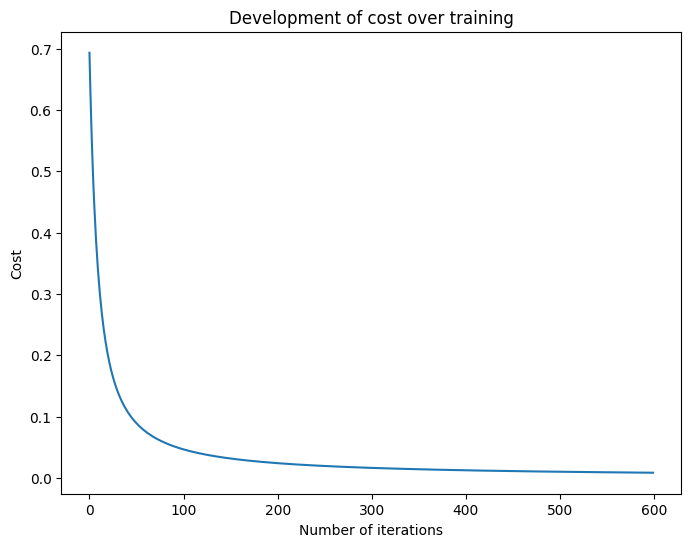

In [24]:
# Initializing and training the model

regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [25]:
# Testing the model
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 100.0%
test accuracy: 100.0%
